# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание проекта  

Заказчик этого исследования — сеть отелей «Как в гостях»  

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента  

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит  

Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь  

# Бизнес-метрика и другие данные  

Основная бизнес-метрика для любой сети отелей — её прибыль. 

Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца  

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня  

Стоимость номеров отеля:  
- категория A: за ночь — 1 000, разовое обслуживание — 400
- категория B: за ночь — 800, разовое обслуживание — 350
- категория C: за ночь — 600, разовое обслуживание — 350
- категория D: за ночь — 550, разовое обслуживание — 150
- категория E: за ночь — 500, разовое обслуживание — 150
- категория F: за ночь — 450, разовое обслуживание — 150
- категория G: за ночь — 350, разовое обслуживание — 150

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.  

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.


# План решения пошагово  

**Шаг 1.** Изучим файлы с данными  

Пути к файлам: 
/datasets/hotel_train.csv — данные для обучения модели  

/datasets/hotel_test.csv — данные для тестирования модели  

**Шаг 2.** Предобработка и исследовательский анализ данных

* Проверка данных и корректировка их, если потребуется  
* Исследовательский анализ представленных данных. Опишсание найденных особенностей: пропуски, выбросы  

**Шаг 3.** Вычисление бизнес-метрики  

Оцените прибыль отеля без внедрения депозитов.

**Шаг 4.** Разработка модели ML

Обучение разных моделей и оценка их качества кросс-валидацией. Выбор лучшей модели и проверка её на тестовой выборке. Описание выводов
Выбор метрики для обучения
Оценка прибыли, которую принесёт выбранная модель за год  

**Шаг 5.** Выявление признаков «ненадёжного» клиента  

На основе исследовательского анализа данных описание клиента, склонного к отказу от брони

**Шаг 6.** Общий вывод

Описание модели, которая решает задачу с наибольшей выгодой для бизнеса. А также, рекомендации бизнесу по результатам проделанной работы

# Шаг 1. Изучим файлы с данными  

Пути к файлам: 
/datasets/hotel_train.csv — данные для обучения модели  

/datasets/hotel_test.csv — данные для тестирования модели

In [137]:
# Импортируем инструменты, которые понадобятся нам для работы:

import pandas as pd

import numpy as np

import scipy.stats as ss

from sklearn.utils import shuffle

import sklearn.metrics as sm

import matplotlib.pyplot as plt

import random

import seaborn as sns

from statsmodels.stats.proportion import proportion_confint

from sklearn.model_selection import train_test_split,learning_curve, cross_val_score, StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, recall_score, precision_score, f1_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, SGDClassifier

from sklearn.feature_selection import SelectKBest, SelectFromModel

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from typing import Union

import warnings
warnings.filterwarnings("ignore")

In [138]:
data_train = pd.read_csv('/datasets/hotel_train.csv')
data_test = pd.read_csv('/datasets/hotel_test.csv')

# Шаг 2. Предобработка и исследовательский анализ данных

* Проверка данных и корректировка их, если потребуется  
* Исследовательский анализ представленных данных. Описание найденных особенностей: пропуски, выбросы  

In [139]:
data_train.head(2)
data_train.info()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [140]:
data_test.head(2)
data_test.info()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [141]:
# Удалим ненужные пробелы в данных таблицы data_train:

data_train['reserved_room_type'] = data_train['reserved_room_type'].apply(lambda x:x.strip())
data_train['meal'] = data_train['meal'].apply(lambda x:x.strip())

In [142]:
# Удалим ненужные пробелы в данных таблицы data_test:

data_test['reserved_room_type'] = data_test['reserved_room_type'].apply(lambda x:x.strip())
data_test['meal'] = data_test['meal'].apply(lambda x:x.strip())

In [143]:
# Проверим количество уникальных совпадений в значимой для исследования колонке (отмена брони): 

print(data_train.is_canceled.value_counts())
print(data_test.is_canceled.value_counts())

0    41185
1    24044
Name: is_canceled, dtype: int64
0    19821
1    12591
Name: is_canceled, dtype: int64


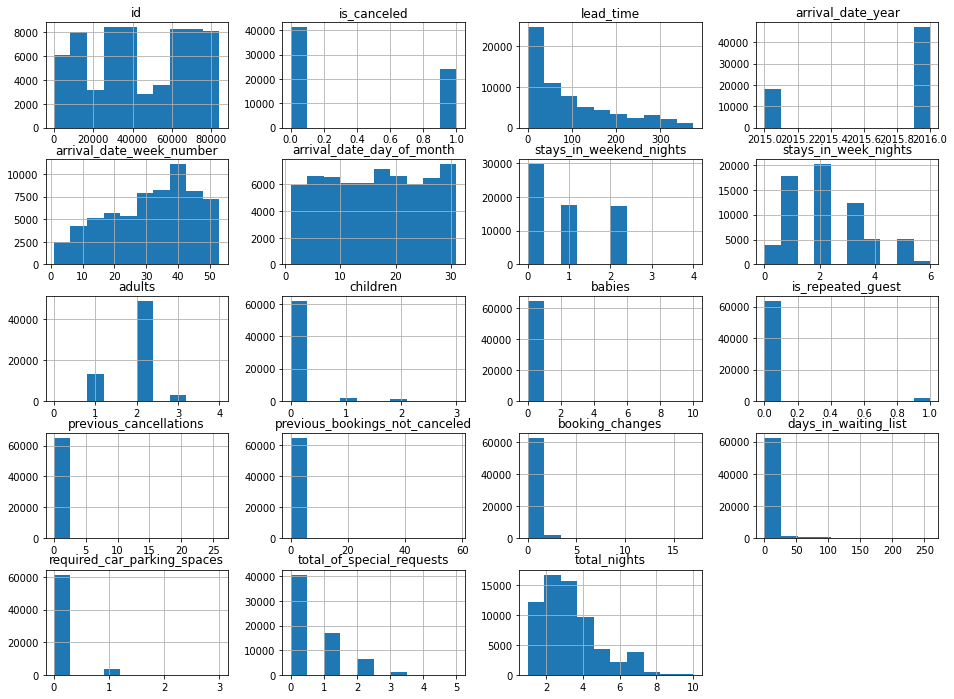

In [144]:
# Изучим распределения значений в данных:

data_train.hist(figsize=[16,12]);


In [145]:
# Изучим содержание колонок с категориальными переменными обучающей выборки:

for col in data_train.select_dtypes(['object']).columns:
    print(col)
    print(data_train[col].value_counts())
    print('_______________')

arrival_date_month
October      9255
September    8782
August       6678
November     5761
July         5718
December     5497
April        4804
May          4677
June         4659
March        4148
February     3358
January      1892
Name: arrival_date_month, dtype: int64
_______________
meal
BB    51697
HB     7292
SC     5789
FB      451
Name: meal, dtype: int64
_______________
country
PRT    28831
FRA     5974
GBR     5109
ESP     4900
DEU     3887
       ...  
LCA        1
ABW        1
ZMB        1
BEN        1
BHR        1
Name: country, Length: 155, dtype: int64
_______________
distribution_channel
TA/TO        54454
Direct        6853
Corporate     3823
GDS             99
Name: distribution_channel, dtype: int64
_______________
reserved_room_type
A    50501
D     9387
E     2448
F     1213
B      860
G      592
C      228
Name: reserved_room_type, dtype: int64
_______________
customer_type
Transient          45493
Transient-Party    16703
Contract            2746
Group         

In [146]:
# Изучим содержание колонок с категориальными переменными тестовой выборки:

for col in data_test.select_dtypes(['object']).columns:
    print(col)
    print(data_test[col].value_counts())
    print('_______________')

arrival_date_month
May         5262
April       4878
June        4580
March       4277
July        3626
February    3543
January     3150
August      3096
Name: arrival_date_month, dtype: int64
_______________
meal
BB    24684
SC     5293
HB     2399
FB       36
Name: meal, dtype: int64
_______________
country
PRT    9887
GBR    3927
FRA    3477
DEU    2378
ESP    1932
       ... 
ABW       1
UMI       1
NCL       1
GAB       1
TZA       1
Name: country, Length: 143, dtype: int64
_______________
distribution_channel
TA/TO        27083
Direct        3642
Corporate     1602
GDS             85
Name: distribution_channel, dtype: int64
_______________
reserved_room_type
A    23471
D     6123
E     1644
F      503
G      278
C      201
B      192
Name: reserved_room_type, dtype: int64
_______________
customer_type
Transient          27461
Transient-Party     4427
Contract             359
Group                165
Name: customer_type, dtype: int64
_______________


# NB!

В данных столбца **'country'** есть перечень стран с низкими количественными показателями, чтобы в дальнейшем не затруднять работу модели - объединим их в значение 'OTHER'. 

Также, удалим колонки **'children','babies'** - т.к. они не влияют на результат, а колонку **'adults'** очистим от нулевых значений и пропусков.

Замену сделаем для обеих выборок

In [147]:
use_countries = data_train['country'].value_counts().head(11).index
use_countries

Index(['PRT', 'FRA', 'GBR', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'NLD', 'BRA',
       'USA'],
      dtype='object')

In [148]:
data_train['country'] = data_train.apply( lambda row: row.country if row.country in  use_countries  else 'OTHER', axis=1)

In [149]:
data_test['country'] = data_test.apply( lambda row: row.country if row.country in  use_countries  else 'OTHER', axis=1)

In [150]:
data_train.drop(columns = ['children','babies'],axis = 1, inplace=True)

In [151]:
data_test.drop(columns = ['children','babies'],axis = 1, inplace=True)

In [152]:
print(' Количество дубликатов в data_train:', data_train.duplicated().sum(),
    '\n','Количество дубликатов в data_test:', data_test.duplicated().sum())

 Количество дубликатов в data_train: 0 
 Количество дубликатов в data_test: 0


# Вывод:  

* Общее распределение данных довольно полное и равномерное
* Пропусков и дубликатов обнаружено не было
* В некоторых столбцах были дополнительные пробелы, которые были исправлены
* В некоторых столбцах был изменен тип данных
* Также, произведено объеденение общих по занчению но разных по количеству показателей (страны откуда прибывали гости отеля), имеющих более низкое количество относительно других

In [170]:
data_train['adults'] = data_train.loc[data_train['adults']!=0]
data_test['adults'] = data_test.loc[data_train['adults']!=0]

In [154]:
#data_train['adults'] = data_train.dropna(subset=['adults'])
#data_test['adults'] = data_test.dropna(subset=['adults'])

In [171]:
data_train['adults'] = data_train['adults'].fillna(1)
data_test['adults'] = data_test['adults'].fillna(1)

In [192]:
#Код ревьюера
data_train.adults.value_counts()
data_test.adults.value_counts()
data_train.info()
data_test.info()

1.0        2
17653.0    1
41920.0    1
80561.0    1
62850.0    1
          ..
4476.0     1
75954.0    1
27691.0    1
73074.0    1
57889.0    1
Name: adults, Length: 65228, dtype: int64

6147     1
23159    1
23422    1
87566    1
84860    1
        ..
52819    1
50770    1
54864    1
91856    1
88225    1
Name: adults, Length: 32412, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  meal                            65229 non-null  object 
 11  country                         65229 non-null  object 
 12  distribution_channel            

# Шаг 3. Вычисление бизнес-метрики  

Оценим прибыль отеля без внедрения депозитов

In [173]:
# Создадим переменные - Стоимости и - Расходов номеров отеля по их типам:

# категория A: за ночь — 1 000, разовое обслуживание — 400
# категория B: за ночь — 800, разовое обслуживание — 350
# категория C: за ночь — 600, разовое обслуживание — 350
# категория D: за ночь — 550, разовое обслуживание — 150
# категория E: за ночь — 500, разовое обслуживание — 150
# категория F: за ночь — 450, разовое обслуживание — 150
# категория G: за ночь — 350, разовое обслуживание — 150

prices = {"A" : 1000, "B" : 800, "C" : 600, "D" : 550, "E" : 500, "F":450, "G":350}
costs = {"A" : 400, "B" : 350, "C" : 350, "D" : 150, "E" : 150, "F":150, "G":150}


In [174]:
# Функция для вычисления расходов на обслуживание номера с учетом его типа:

def get_cost (row):
    if row.is_canceled == 1:
        return 0
    if row.total_nights <= 2:
        return costs[row.reserved_room_type]
    else:
        return costs[row.reserved_room_type]*(row.total_nights//2+1)

In [175]:
# Функция для вычисления выручки за номер с учетом его типа и сезонного коэффицента:

def get_income (row):  
    
    if row.arrival_date_month in ['June','July','August']:
        coef =1.4
    elif row.arrival_date_month in ['December','February','January']:
        coef = 1
    else:
        coef = 1.2
        
    if  row.is_canceled == 1:    
        coef = 0
        
    return prices[row.reserved_room_type]*(row.total_nights)*coef

In [176]:
# Функция вычисления убытка при отмене бронирования с учетом типа номера и коэффицента сезонности:

def canc (row):   
    if row.arrival_date_month in ['June','July','August']:
        coef =1.4
    elif row.arrival_date_month in ['December','February','January']:
        coef = 1
    else:
        coef = 1.2
    if row.is_canceled == 1: 
        cancelled_cost = prices[row.reserved_room_type]*coef + costs[row.reserved_room_type]*coef
    if row.is_canceled == 0:
        cancelled_cost = 0
    return cancelled_cost

In [177]:
# Добавим новые столбцы в обучающую таблицу:

data_train['income'] = data_train.apply(get_income, axis=1)
data_train['cost'] = data_train.apply(get_cost, axis=1)
data_train['canc'] = data_train.apply(canc, axis=1)

In [178]:
print('Сумма выручки за период равна:', data_train['income'].sum())
print('Сумма расходов на обслуживание номеров за период равна:', data_train['cost'].sum())
print('Сумма прибыли отеля за период равна:', data_train['income'].sum()-data_train['cost'].sum())
print('Сумма упущенной выгоды из за отмены брони за период равна:', data_train['canc'].sum())

Сумма выручки за период равна: 132498270.0
Сумма расходов на обслуживание номеров за период равна: 27421100
Сумма прибыли отеля за период равна: 105077170.0
Сумма упущенной выгоды из за отмены брони за период равна: 37601230.0


In [179]:
# Расчет для тестовой выборки:

data_test['income'] = data_test.apply(get_income, axis=1)
data_test['cost'] = data_test.apply(get_cost, axis=1)
data_test['canc'] = data_test.apply(canc, axis=1)

In [180]:
print('Сумма выручки за период равна:', data_test['income'].sum())
print('Сумма расходов на обслуживание номеров за период равна:', data_test['cost'].sum())
print('Сумма прибыли отеля за период равна:', data_test['income'].sum()-data_test['cost'].sum())
print('Сумма упущенной выгоды из за отмены брони за период равна:', data_test['canc'].sum())

Сумма выручки за период равна: 65288980.0
Сумма расходов на обслуживание номеров за период равна: 13339450
Сумма прибыли отеля за период равна: 51949530.0
Сумма упущенной выгоды из за отмены брони за период равна: 19046800.0


# Вывод по обучающей выборке (период 2015-2016):

* Сумма упущенной выгоды из за отмены брони за период равна: **37 601 230.0**, что составляет около **27%**  от выручки за указанный период.
* **27%** достаточное значение, чтобы считать проблему весомой для предприятия, таким образом необходимость во внедрении системы определения потенциально проблемного клиента и внесения им безвозвратной предоплаты, имеет место

# Вывод по тестовой выборке (8 мес. 2017 год):  

* Сумма упущенной выгоды из за отмены брони за период равна: **19 046 800.0**, что составляет около 30 % от выручки за указанный период.

# Шаг 4. Разработка модели ML

* Обучение разных моделей и оценка их качества кросс-валидацией.  
* Выбор лучшей модели и проверка её на тестовой выборке.   
* Описание выводов.  
* Выбор метрики для обучения.  
* Оценка прибыли, которую принесёт выбранная модель за год  

In [181]:
pd.set_option('display.max_columns',100)
display(data_train.head(5))

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,income,cost,canc
0,0,0,7.0,2015,July,27,1,0,1,1.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1,1400.0,400,0.0
1,1,0,14.0,2015,July,27,1,0,2,1.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2,2800.0,400,0.0
2,2,0,0.0,2015,July,27,1,0,2,2.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2,1680.0,350,0.0
3,3,0,9.0,2015,July,27,1,0,2,3.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2,1680.0,350,0.0
4,4,1,85.0,2015,July,27,1,0,3,4.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3,0.0,0,1960.0


In [182]:
# Предобработка для модели - определим списки используемых столбцов:

target_value = 'is_canceled' # целевая переменная

data_cat = ['arrival_date_month','meal','country','distribution_channel','is_repeated_guest','reserved_room_type',
            'customer_type',]  # категориальная переменная

data_col = ['lead_time','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults',
           'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
            'required_car_parking_spaces','total_of_special_requests','total_nights'] # количественная переменная

Проведем преобразование категориальных признаков в численные техникой One-Hot Encoding

In [183]:
enc = OneHotEncoder( drop='first')
enc.fit(data_train[data_cat])

OneHotEncoder(drop='first')

In [184]:
onehot_train = pd.DataFrame(enc.transform(data_train[data_cat]).toarray(), columns = enc.get_feature_names(data_cat))

In [185]:
onehot_test = pd.DataFrame(enc.transform(data_test[data_cat]).toarray(),columns = enc.get_feature_names(data_cat))

In [186]:
onehot_train= pd.concat([onehot_train,data_train[data_col]],axis=1)

In [187]:
onehot_test= pd.concat([onehot_test,data_test[data_col]],axis=1)

In [188]:
#onehot_test.info()

**Проверим несколько моделей по разным метрикам, таким как:**

Хорошо, когда значение **recall** близко к единице: модель хорошо ищет положительные объекты.  
Если ближе к нулю — модель надо перепроверить и починить.

Точность **precision** определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

Полнота и точность оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. 
Precision выявляет, не переусердствует ли модель, присваивая положительные метки.

Контролировать их параллельно помогают агрегирующие метрики, одна из которых — **F1-score**. Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1.

**Сначала проверим модель Логистической регрессии:**

In [189]:
# Accuracy модели:

features = onehot_train
target = data_train[target_value]

model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log.fit(features, target)


print(model_log.score(features, target))

LogisticRegression(max_iter=1000, random_state=12345)

0.7848043048337396


In [190]:
# Рассчитаем precision, recall, F1-score и матрицу ошибок модели:

predicted = model_log.predict(features)
print('Полнота модели составила:', recall_score(target,predicted))
print('Точность модели составила:', precision_score(target,predicted))
print('F1 - мера модели составила:', f1_score(target,predicted))
print('Матрица ошибок модели:','\n', confusion_matrix(target,predicted))

Полнота модели составила: 0.6693977707536184
Точность модели составила: 0.7255556056439616
F1 - мера модели составила: 0.6963462911285613
Матрица ошибок модели: 
 [[35097  6088]
 [ 7949 16095]]


In [191]:
# Кросс - валидация:  

scores = cross_val_score(model_log,features,target, cv = 5)

final_score = sum(scores)/len(scores)

print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.6832887314968346


**Попробуем SGDClassifier как метод подгонки линейных классификаторов и регрессоров под выпуклые функции потерь, такие как (линейные) Метод опорных векторов и логистическая регрессия**

SGDClassifier(loss='modified_huber', max_iter=10)

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Кривая Precision-Recall')

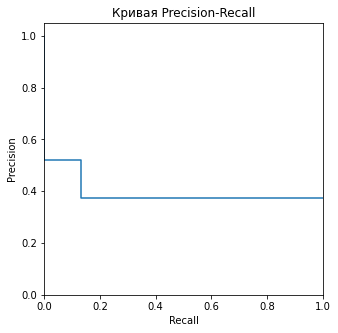

0.5301584492512897


In [196]:
features = onehot_train
target = data_train[target_value]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = SGDClassifier(loss='modified_huber', penalty="l2", max_iter=10)
model.fit(onehot_train,data_train[target_value])

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
probabilities_one_valid = probabilities_valid[:,1]

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)

print(auc_roc)

In [197]:
predicted_valid = model.predict(features_valid)

print('Полнота модели составила:', recall_score(target_valid,predicted_valid))
print('Точность модели составила:', precision_score(target_valid,predicted_valid))
print('F1 - мера модели составила:', f1_score(target_valid,predicted_valid))
print('Матрица ошибок модели:','\n', confusion_matrix(target_valid,predicted_valid))

Полнота модели составила: 0.13411222642751358
Точность модели составила: 0.5191082802547771
F1 - мера модели составила: 0.2131554858114293
Матрица ошибок модели: 
 [[9476  755]
 [5262  815]]


In [198]:
# Кросс - валидация:  

scores = cross_val_score(model,features,target, cv = 5)

final_score = sum(scores)/len(scores)

print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.6096388678513338


Вариант **RandomForest**

Алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования. Случайный лес помогает улучшить результат предсказания и избежать переобучения.

RandomForestClassifier(random_state=12345)

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Кривая Precision-Recall')

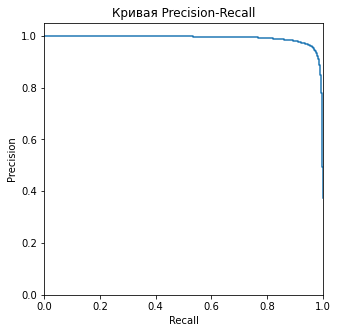

0.9937359533849852


In [199]:
features = onehot_train
target = data_train[target_value]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
probabilities_one_valid = probabilities_valid[:,1]

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)

print(auc_roc)

In [200]:
predicted_valid = model.predict(features_valid)

print('Полнота модели составила:', recall_score(target_valid,predicted_valid))
print('Точность модели составила:', precision_score(target_valid,predicted_valid))
print('F1 - мера модели составила:', f1_score(target_valid,predicted_valid))
print('Матрица ошибок модели:','\n', confusion_matrix(target_valid,predicted_valid))

Полнота модели составила: 0.9504689814052987
Точность модели составила: 0.9654019722547217
F1 - мера модели составила: 0.9578772802653399
Матрица ошибок модели: 
 [[10024   207]
 [  301  5776]]


In [201]:
# Кросс - валидация:  

scores = cross_val_score(model,features,target, cv = 5)

final_score = sum(scores)/len(scores)

print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.6614543343902024


# Выводы по выборке data_train:

* **Модель обученная на Логистической регрессии показала результаты:**  
**accuracy*  0.7848043048337396 
**Полнота модели составила:*  0.6693977707536184
**Точность модели составила:*  0.7255556056439616
**F1 - мера модели составила:*  0.6963462911285613
**Матрица ошибок модели:*  [[35097  6088][8926 16095]] 

 35097 - положительных точек данных были правильно классифицированы моделью  
 16095 - отрицательных точек данных были правильно классифицированы моделью  
 6088   - отрицательных точек данных были неправильно классифицированы моделью как положительные  
 7949 -  положительных точек данных были неправильно классифицированы моделью как отрицательные  
 
 **Кросс-валидация:** 0.6832887314968346  
 
                            
* **Модель обученная на SGDClassifier показала результаты:**  
**roc_auc_score* 0.5301584492512897 
**Полнота модели составила:* 0.13411222642751358
**Точность модели составила:* 0.5191082802547771
**F1 - мера модели составила:* 0.2131554858114293
**Матрица ошибок модели:*  [[9476 755][5262 815]]  

 9476 - положительных точек данных были правильно классифицированы моделью  
 815 - отрицательных точек данных были правильно классифицированы моделью  
 755 - отрицательных точек данных были неправильно классифицированы моделью как положительные  
 5262   -  положительных точек данных были неправильно классифицированы моделью как отрицательные  
 
 **Кросс-валидация:** 0.6096388678513338
                         
* **Модель обученная на RandomForest показала результаты:** 
**roc_auc_score* 0.9937359533849852  
**Полнота модели составила:* 0.9504689814052987
**Точность модели составила:* 0.9654019722547217
**F1 - мера модели составила:* 0.9578772802653399
**Матрица ошибок модели:*  [[10024  207][301 5776]]  

 10024 - положительных точек данных были правильно классифицированы моделью  
 5776 - отрицательных точек данных были правильно классифицированы моделью  
 207   - отрицательных точек данных были неправильно классифицированы моделью как положительные  
 301 -  положительных точек данных были неправильно классифицированы моделью как отрицательные  
 
 **Кросс-валидация:** 0.6614543343902024
 
 
 **Думаю, что Случайный Лес показало самые оптимальные результаты, теперь попробуем на нем тестовую выборкую**

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Кривая Precision-Recall')

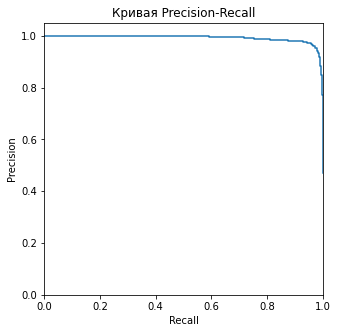

0.9951450038242559


In [204]:
# Случайный лес для data_test:

features = onehot_test
target = data_test[target_value]

probabilities_valid = model.predict_proba(features)
precision, recall, thresholds = precision_recall_curve(target, probabilities_valid[:, 1])
probabilities_one_valid = probabilities_valid[:,1]

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

auc_roc = roc_auc_score(target,probabilities_one_valid)

print(auc_roc)

In [203]:
predicted_valid = model.predict(features)

print('Полнота модели составила:', recall_score(target,predicted_valid))
print('Точность модели составила:', precision_score(target,predicted_valid))
print('F1 - мера модели составила:', f1_score(target,predicted_valid))
print('Матрица ошибок модели:','\n', confusion_matrix(target,predicted_valid))

Полнота модели составила: 0.7151933921054722
Точность модели составила: 0.9943683745583038
F1 - мера модели составила: 0.8319859564835774
Матрица ошибок модели: 
 [[19770    51]
 [ 3586  9005]]


# Выводы по выборке data_test:  

* **Модель обученная на RandomForest показала результаты:** 
**roc_auc_score* 0.9951450038242559
**Полнота модели составила:* 0.7151933921054722
**Точность модели составила:* 0.9943683745583038
**F1 - мера модели составила:* 0.8319859564835774
**Матрица ошибок модели:*  [[19770 51][3586 9005]]  

 19770- положительных точек данных были правильно классифицированы моделью    
 9005- отрицательных точек данных были правильно классифицированы моделью   
 51   - отрицательных точек данных были неправильно классифицированы моделью как положительные    
 3586  -  положительных точек данных были неправильно классифицированы моделью как отрицательные  


# Вычислим прибыль, которую за год принесет нам выбранная модель

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

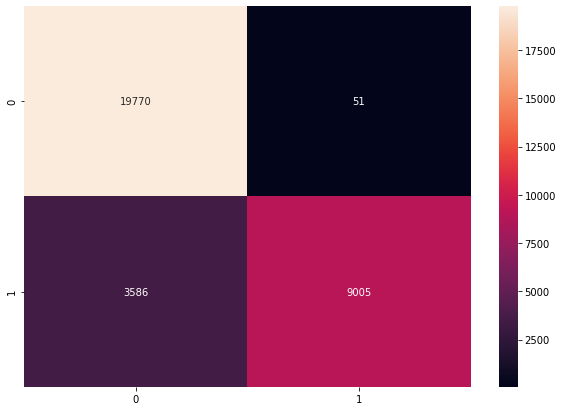

In [205]:
# Визуалтзируем матрицу ошибок:

arr = confusion_matrix(target,predicted_valid)
df_cm = pd.DataFrame(arr, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt ='g')

In [206]:
# Создадим переменные для итогового фин.анализа на полученных предсказания модели:

data_test_fin = data_test[['income','cost','canc','is_canceled']]
data_test_fin['pred'] = predicted_valid
# data_test_fin

In [207]:
# Переменная TP (True positive) показывает угаданные моделью отказы от брони:

TP_df =data_test_fin[(data_test_fin['is_canceled'] == 1) & (data_test_fin['pred'] == 1)]
TP_df_accept = TP_df.head(2936)
TP_df_decline = TP_df.tail(TP_df.shape[0]-2936)

In [208]:
TP_df_accept['new_income']= TP_df_accept['canc']*0.8
TP_df_accept['new_cost'] = TP_df_accept['cost']
TP_df_accept['new_canc']= TP_df_accept['canc']

TP_df_decline['new_income']= 0
TP_df_decline['new_cost'] = TP_df_decline['cost']
TP_df_decline['new_canc']= 0

TP_df = pd.concat([TP_df_accept,TP_df_decline])
TP_df.head(2)


,income,cost,canc,is_canceled,pred,new_income,new_cost,new_canc
0,0.0,0,1400.0,1,1,1120.0,0,1400.0
3,0.0,0,1400.0,1,1,1120.0,0,1400.0


In [209]:
# Переменная FP (False positive) показывает значения, которые модель оценила как потенциальную отмену,но ошиблась:

FP_df =data_test_fin[(data_test_fin['is_canceled'] == 0) & (data_test_fin['pred'] == 1)]
FP_df_accept = FP_df.head(round(FP_df.shape[0]/2))
FP_df_decline = FP_df.tail(FP_df.shape[0]-round(FP_df.shape[0]/2))

In [210]:
FP_df_decline['new_income']=0
FP_df_decline['new_cost']=0
FP_df_decline['new_canc']=0


FP_df_accept['new_income']=FP_df_accept['income']
FP_df_accept['new_cost']=FP_df_accept['cost']
FP_df_accept['new_canc']=FP_df_accept['canc']

FP_df = pd.concat([FP_df_accept,FP_df_decline])
FP_df.head(2)

,income,cost,canc,is_canceled,pred,new_income,new_cost,new_canc
2179,2520.0,450,0.0,0,1,2520.0,450,0.0
2231,3600.0,800,0.0,0,1,3600.0,800,0.0


In [211]:
# Переменная True negative & False negative, показывает состаявшиеся брони независимо от предсказания модели:

TN_FN_DF  = data_test_fin[ (data_test_fin['pred'] == 0)]
TN_FN_DF['new_income']=TN_FN_DF['income']
TN_FN_DF['new_cost']=TN_FN_DF['cost']
TN_FN_DF['new_canc']=TN_FN_DF['canc']
TN_FN_DF.head(2)

,income,cost,canc,is_canceled,pred,new_income,new_cost,new_canc
1,0.0,0,1400.0,1,0,0.0,0,1400.0
2,0.0,0,1400.0,1,0,0.0,0,1400.0


In [212]:
# Соединим полученные результаты:

result_df = pd.concat([FP_df,TP_df,TN_FN_DF])
result_df

,income,cost,canc,is_canceled,pred,new_income,new_cost,new_canc
2179,2520.0,450,0.0,0,1,2520.0,450,0.0
2231,3600.0,800,0.0,0,1,3600.0,800,0.0
4081,4000.0,1200,0.0,0,1,4000.0,1200,0.0
4709,1200.0,400,0.0,0,1,1200.0,400,0.0
4731,660.0,150,0.0,0,1,660.0,150,0.0
...,...,...,...,...,...,...,...,...
32407,8400.0,1600,0.0,0,0,8400.0,1600,0.0
32408,9800.0,1600,0.0,0,0,9800.0,1600,0.0
32409,9800.0,1600,0.0,0,0,9800.0,1600,0.0
32410,5390.0,600,0.0,0,0,5390.0,600,0.0


В задаче необходимо указать результат прибыли за год, в обучающей выборке мы имеем данные за 2015 и 2016 годы. А тестовая содержит данные за 8 месяцев 2017 года. Таким образом, рассчет будет с учетом этих данных

In [213]:
# Количество данных в обучающей выборке за 2015 год:

data_train[data_train['arrival_date_year']==2015].shape

(18328, 26)

In [214]:
# Количество данных в обучающей выборке за 2016 год:

data_train[data_train['arrival_date_year']==2016].shape

(46901, 26)

In [215]:
data_test[data_test['arrival_date_year']==2017].shape

(32412, 26)

In [216]:
data_test.arrival_date_month.value_counts()

May         5262
April       4878
June        4580
March       4277
July        3626
February    3543
January     3150
August      3096
Name: arrival_date_month, dtype: int64

In [217]:
# Результат года с использованием модели будет:

print('Сумма выручки за период равна:', result_df['new_income'].sum()*47/32)
print('Сумма расходов на обслуживание номеров за период равна:', result_df['new_cost'].sum()*47/32)
print('Сумма прибыли отеля за период равна:', (result_df['new_income'].sum()-result_df['new_cost'].sum())*47/32)
print('Сумма упущенной выгоды из за отмены брони за период равна:', result_df['new_canc'].sum()*47/32)

Сумма выручки за период равна: 100167246.0
Сумма расходов на обслуживание номеров за период равна: 19561620.3125
Сумма прибыли отеля за период равна: 80605625.6875
Сумма упущенной выгоды из за отмены брони за период равна: 13763626.875


# Вывод:   

* Для решения поставленной задачи, была выбрана модель обученная на алгоритме Случайного леса - она показала наиболее стабильный и высокий результат.
* Используя данную модель за год, с учетом предположения что на депозит 80% согласится только 50% от клиентов, которых модель идентифицирует как "потенциальную отмену брони" мы получили следующий результат:  

**Сумма выручки за год составит:** 100 167 246.0  
**Сумма расходов на обслуживание номеров за год составит:** 19 561 620.31  
**Сумма прибыли отеля за год составит:** 80 605 625.68  
**Сумма упущенной выгоды из за отмены брони за год составит:**  13 763 626.87 

# Шаг 5. Выявление признаков «ненадёжного» клиента  

На основе исследовательского анализа данных описание клиента, склонного к отказу от брони

In [218]:
# Посмотрим на коэффицент 15 главных признаков, влияющих на вероятность отказа от брони:

feats = pd.DataFrame(model_log.coef_.T)
feats['feat'] = onehot_train.columns
feats.columns=['coef','feat']
feats.sort_values(by=['coef'], ascending= False).head(15)

,coef,feat
23,1.193749,country_PRT
43,0.829592,previous_cancellations
36,0.704091,customer_type_Transient
27,0.455693,distribution_channel_TA/TO
13,0.139992,meal_SC
1,0.070406,arrival_date_month_December
2,0.056332,arrival_date_month_February
5,0.046098,arrival_date_month_June
20,0.020980,country_ITA
14,0.016974,country_BRA


# Почему я выбрала модель Случайный лес, но признаки ненадежного клиента ищу в Логистической регрессии:

**Как я поняла задачу, есть необходимость обучить модель определять отмену, по моему исследованию для неё оптимален - Случайный лес;**

**Но и есть задача описать клиента, для этого я использую Логистическую регрессию т.к. Лес неинтерпретируемый**

* Самый высокий коэффицент (1.193749) признак - **У гостей из Португалии (country_PRT)**

* Также часто отменяют бронь гости из стран: 

Италии (0.020980)  
Бразилии (0.016974)

* Также, часто отменяют те, кто делал это и ранее (0.829592) - **previous_cancellations**

* Туристы, которые бронируют на месяцы:
- Декабрь (0.070406) - **arrival_date_month_December**
- Февраль (0.056332) - **arrival_date_month_February**
- Июнь (0.046098) - **arrival_date_month_June**
- Август (0.000826) - **arrival_date_month_August**

* Туристы путешествующие самостоятельно (0.704091) **Не связано с договором или групповым заездом (Transient)**  

* Туристы заказывающие питание (0.011218) по типу **FB** (трехразовое) **meal**   

* Туристы сделавшие заказ через турагентов/туроператоров (TA/TO) (0.455693) **Канал дистрибуции заказа (distribution_channel)**

* Туристы сделавшие заказ через Глобальную дистрибьюторскую систему — это международная система бронирования (0.001114) **distribution_channel_GDS**

* Туристы не выбравшие дополнительные опции (0.139992) **SC - meal**  

* Туристы выбирающие категории номеров **D** (0.000892) **reserved_room_type**

# Шаг 6. Общий вывод

Описание модели, которая решает задачу с наибольшей выгодой для бизнеса. А также, рекомендации бизнесу по результатам проделанной работы

До внедрения системы депозитов, по итогам 2015 и 2016 годов (объединены) мы имели следующий результат:  

* Сумма выручки за период составляла: 132 498 270.00
* Сумма расходов на обслуживание номеров за период составляла: 27 421 100.00
* Сумма прибыли отеля за период составляла: 105 077 170.00
* Сумма упущенной выгоды из за отмены брони за период составляла: 37 601 230.00

По поставленной задаче, нужно было обучить модель которая сможет вычислять в заявках клиента который вероятно откажется от брони, таким образом отель получит убыток.  

В поиске алгоритма для обучения были проверены: 

* Логистическая регрессия
* Случайный лес
* SGDClassifier  

Лучшие результаты показал алгоритм - **Случайный лес**, он же был применени к тестовой выборке.  

После обучения модели был сделан прогноз прибыли за год, с учетом следующих факторов:  

* Предположение, что 50% потенциальных клиентов откажутся от брони с депозитом  
  
И получили результат:  

* Сумма выручки за год составит: 100 167 246.0
* Сумма расходов на обслуживание номеров за год составит: 19 561 620.31
* Сумма прибыли отеля за год составит: 80 605 625.68
* Сумма упущенной выгоды из за отмены брони за год составит: 13 763 626.87

По сравнению с данными тестовой выборки без внедрения депозита 80% мы получили результат:  

* Сумма выручки за год уменьшится на 32 млн.
* Сумма расходов на обслуживание номеров за год меньше на 7,8 млн.
* Сумма прибыли отеля за год уменьшиться суммарно на 25 млн.
* Сумма упущенной выгоды из за отмены брони за год уменьшится на 21 млн.

Несмотря на уменьшение суммы прибыли после внедрения депозита, справедливо считать внедрение модели выгодной, т.к. сумма экономии на обслуживании номеров и уменьшение размера упущенной выгоды составит **28 млн.** , таким образом покрыв сумму на которую уменьшится прибыль отеля.  


**На основе исследовательского анализа данных был получен портрет клиента, склонного к отказу от брони:**

Самый высокий коэффицент гостей из Португалии. Также часто отменяют бронь гости из стран: - Италия и Бразилия. Также, часто отменяют те, кто делал это и ранее - previous_cancellations.  

Туристы, которые бронируют на месяцы: - Декабрь; - Февраль; - Июнь; - Август; 

Туристы путешествующие самостоятельно. Туристы сделавшие заказ через турагентов/туроператоров и через Глобальную дистрибьюторскую систему. Туристы заказывающие питание по типу FB (трехразовое).  

Туристы не выбравшие дополнительные опции. Туристы выбирающие категории номеров D. 

Таким образом, систему внедрения депозита для клиентов попадающих под алгоритм модели можно считать экономически оправданной для Заказчика, в том числе и с учетом репутационных особенностей туристической сферы.  